# 1. Exploratory analysis (EDA), standarization, normalization, outliers and encoding

In [8]:
# Data handling
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Standarization
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from scipy import stats

# Encoding
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder  
from sklearn.preprocessing import OrdinalEncoder

# Plots
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Preprocessing and modeling
plt.rcParams['figure.figsize'] = (10,8)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import cohen_kappa_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import tree

# Pepinillo
import pickle

# Warning configuration
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Reads csv
df_train = pd.read_csv('../data/train.csv', index_col=0)
df_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983
3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371
4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588


### Features
- id: only for test & sample submission files, id for prediction sample identification
- price: price in USD
- carat: weight of the diamond
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour
- clarity: a measurement of how clear the diamond is
- x: length in mm
- y: width in mm
- z: depth in mm
- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- table: width of top of diamond relative to widest point (43--95)

### Info:
- 1 carat = 200mg

In [10]:
df_density = df_train.copy()
df_density['weight'] = df_density.carat * 200 # mg
df_density['volume'] = df_density.x * df_density.y * df_density.z # mm3
df_density['volume'] = df_density['volume'] / 3 # aprox for a diamond
df_density['density'] = df_density['weight']/df_density['volume'] #mg/mm3
df_density['density'] = df_density['density'] * 1000 #kg/m3
df_density.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,weight,volume,density
id,,,,,,,,,,,,,
0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353,60.0,16.479141,3640.966406
1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183,202.0,55.850576,3616.793496
2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983,144.0,38.674972,3723.338184
3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371,216.0,58.380400,3699.871875
4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588,72.0,19.246500,3740.939911


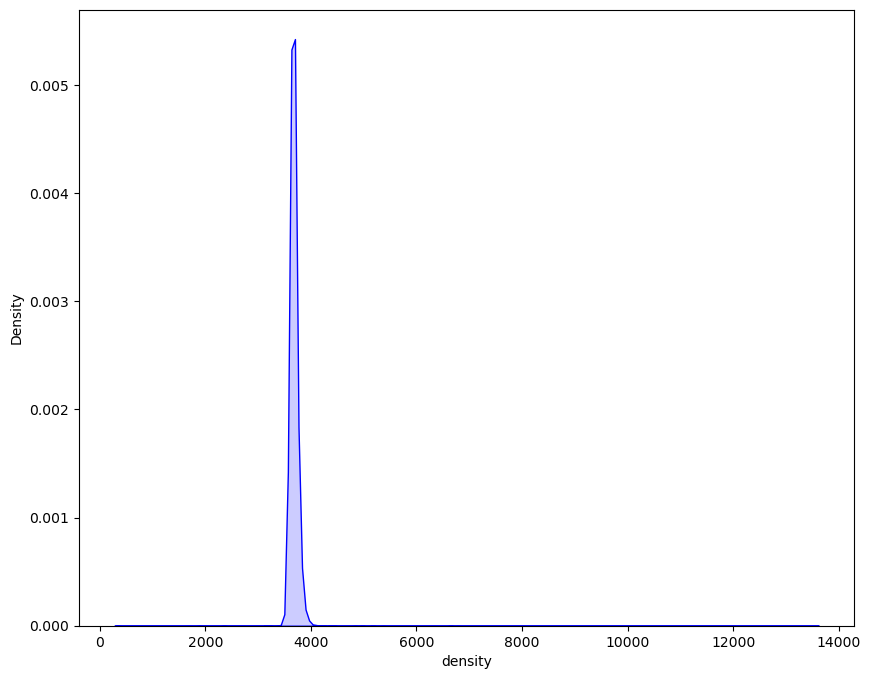

In [11]:
sns.kdeplot(
    df_density.density, 
    color='blue',
    fill=True,
    alpha=.2);

<Axes: xlabel='density'>

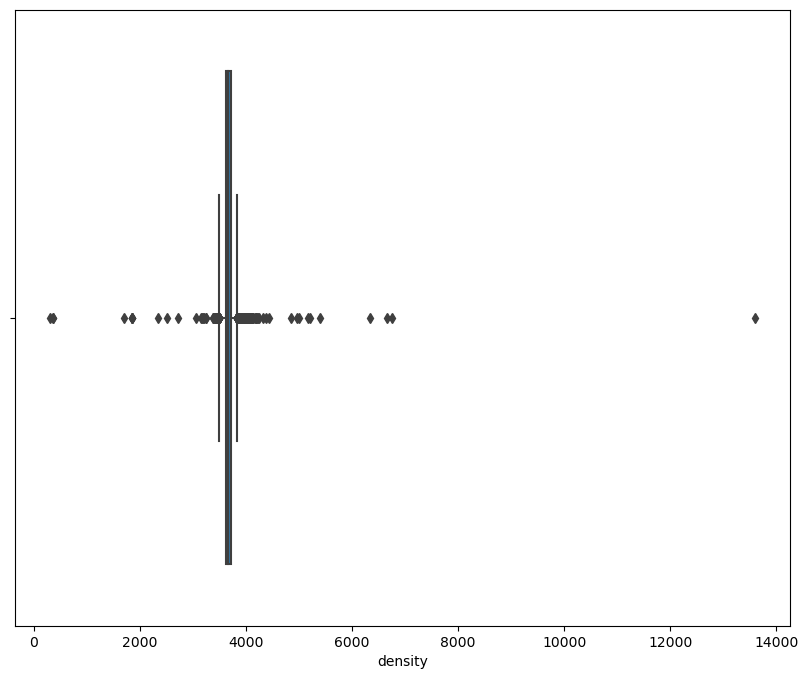

In [12]:
sns.boxplot(
        data=df_density,
        x=df_density.density)

In [13]:
# mean density of a diamond = 3500
# threshold = 5 %

threshold = 0.05

df_density = df_density[(df_density.density > 3500-3500*threshold) & (df_density.density < 3500+3500*threshold)]
df_density.drop(['weight', 'volume', 'density'], axis=1, inplace=True)
df_density

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
7,0.33,Ideal,E,VVS2,60.0,56.0,4.53,4.56,2.72,6.877
8,0.32,Very Good,E,VS2,62.9,56.0,4.36,4.39,2.75,6.554
10,0.63,Ideal,D,SI1,61.1,56.0,5.52,5.58,3.39,7.484
...,...,...,...,...,...,...,...,...,...,...
40446,1.01,Premium,F,VS1,61.3,58.0,6.44,6.52,3.97,8.854
40448,0.41,Premium,F,VVS2,60.6,58.0,4.79,4.84,2.92,7.017
40450,0.42,Premium,D,SI2,62.1,59.0,4.78,4.82,2.98,6.551


# Exploratory analysis (EDA)

### General information:

In [14]:
df_train = df_density

In [15]:
df_train.shape

(21438, 10)

In [16]:
df_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21438 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    21438 non-null  float64
 1   cut      21438 non-null  object 
 2   color    21438 non-null  object 
 3   clarity  21438 non-null  object 
 4   depth    21438 non-null  float64
 5   table    21438 non-null  float64
 6   x        21438 non-null  float64
 7   y        21438 non-null  float64
 8   z        21438 non-null  float64
 9   price    21438 non-null  float64
dtypes: float64(7), object(3)
memory usage: 1.8+ MB


In [18]:
df_train.select_dtypes(include=np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
carat,21438.0,0.691101,0.432259,0.200,0.340,0.530,1.010,3.220
depth,21438.0,61.315099,1.259566,51.000,60.700,61.500,62.100,68.500
table,21438.0,56.789332,2.109810,49.000,55.000,56.000,58.000,95.000
x,21438.0,5.498616,1.088908,3.740,4.520,5.230,6.450,9.490
y,21438.0,5.506548,1.081985,3.710,4.530,5.240,6.450,9.420
z,21438.0,3.370763,0.651400,2.290,2.780,3.220,3.920,5.920
price,21438.0,7.572206,0.999992,5.787,6.718,7.437,8.382,9.842


In [19]:
df_train.describe(include='object').T

,count,unique,top,freq
cut,21438,5,Ideal,11893
color,21438,7,G,4582
clarity,21438,8,VS2,4886


### Nulls and duplicated:

In [20]:
df_train.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [21]:
# df_train[df_train.duplicated() == True].value_counts().sum()
df_train.duplicated().sum()

37

In [22]:
df_train.drop_duplicates(inplace=True)

In [23]:
df_train.duplicated().sum()

0

## Variables:
- Response: 
    - Numeric: price
- Predict:
    - Numeric: carat, depth, table, x, y, z
    - Categoric: cut, color, clarity

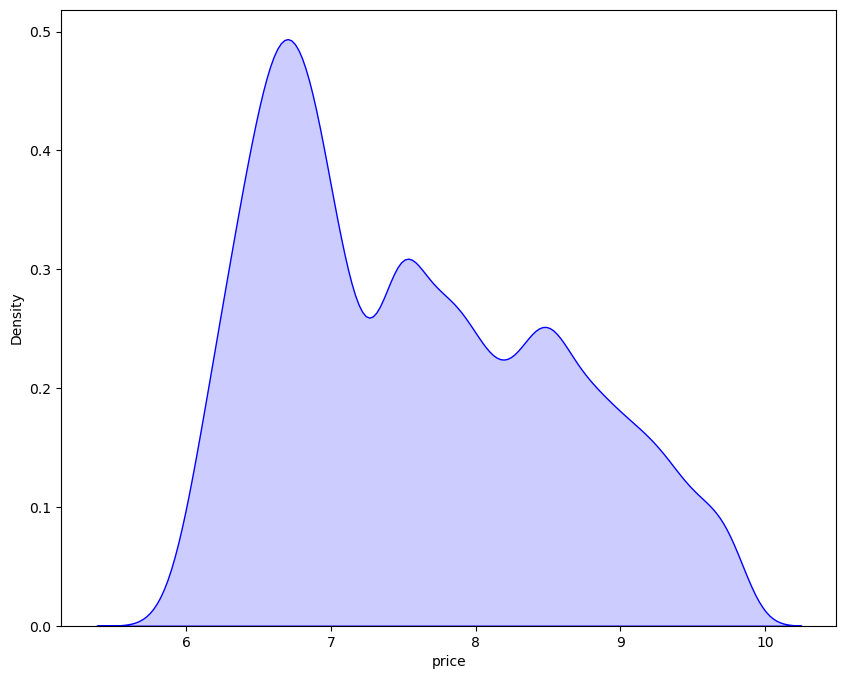

In [24]:
# Viz of the response variable

sns.kdeplot(
    df_train.price, 
    color='blue',
    fill=True,
    alpha=.2);

In [25]:
stats.shapiro(df_train['price'])
# p-value = 0 < 0.05
# Response variable doen't follow a normal distribution

ShapiroResult(statistic=0.9494912624359131, pvalue=0.0)

## Prediction variables:

#### Numeric:

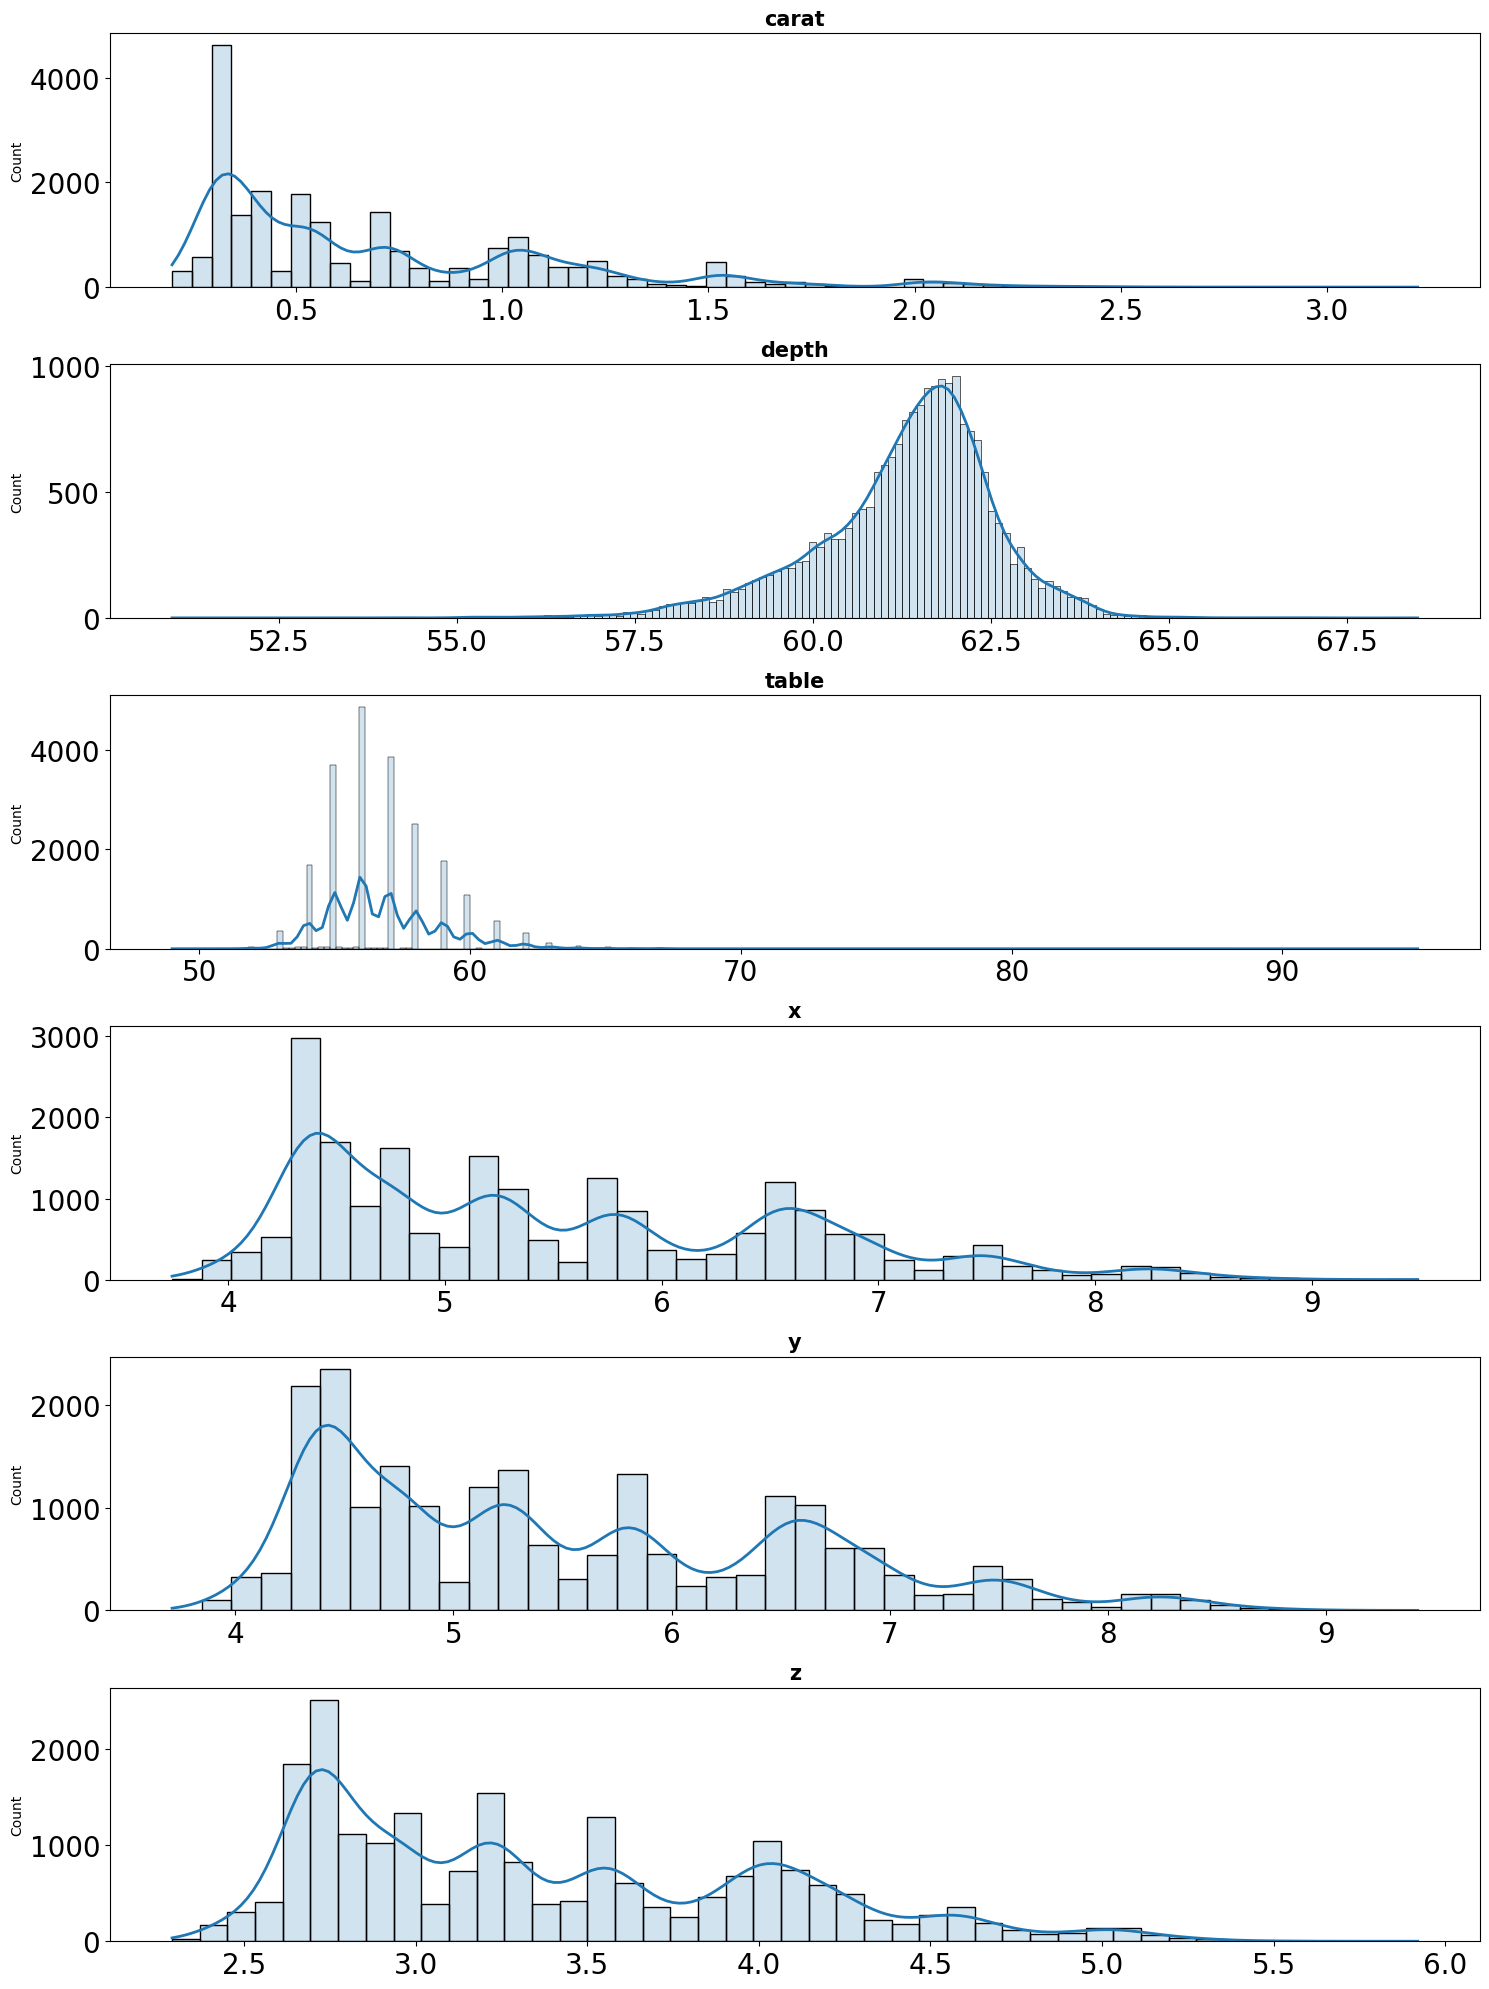

In [26]:
# Numeric variables viz:

fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15, 20))

axes = axes.flat

columnas_numeric = df_train.drop(['price'], axis=1).select_dtypes(include=np.number)

for i, colum in enumerate(columnas_numeric.columns): 
    sns.histplot(
        data=columnas_numeric,
        x=colum,
        kde=True, 
        line_kws={'linewidth': 2}, 
        alpha=0.2, 
        ax=axes[i])
    
    
    axes[i].set_title(colum, fontsize=15, fontweight='bold')
    axes[i].tick_params(labelsize=20)
    axes[i].set_xlabel('')
    

fig.tight_layout();

#### Categoric:

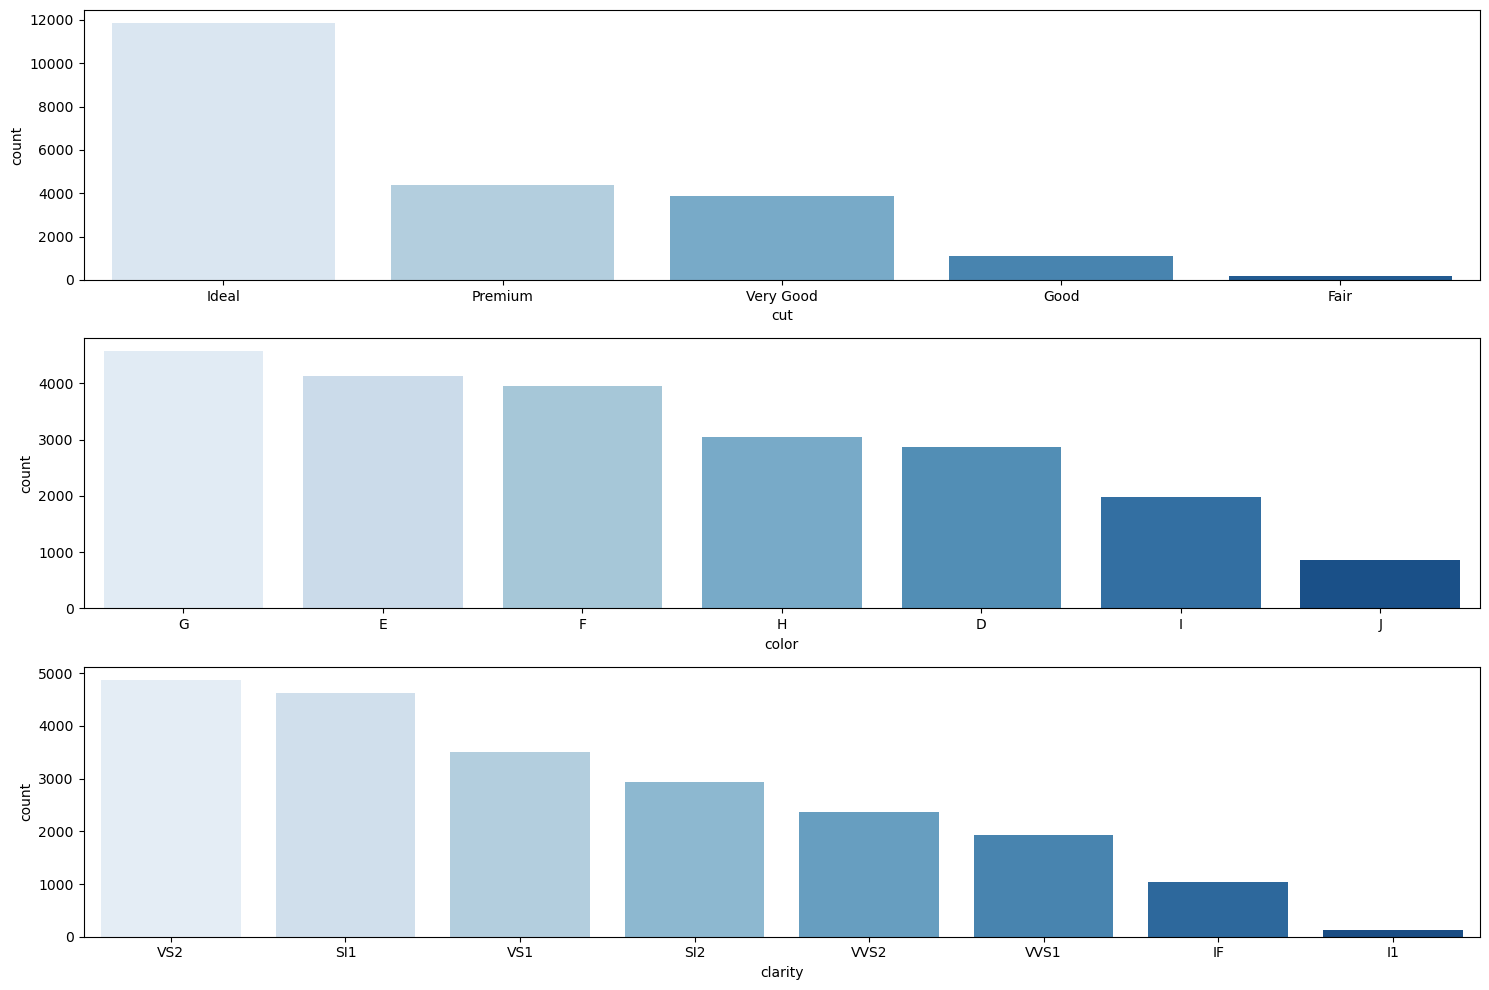

In [27]:
# Categoric variables viz:

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

axes = axes.flat

columnas_categoric = df_train.select_dtypes(include='object').columns

for i, col in enumerate(columnas_categoric):
    sns.countplot(
                x=df_train[col], 
                ax=axes[i],
                palette='Blues',
                order=df_train[col].value_counts().index)

fig.tight_layout();

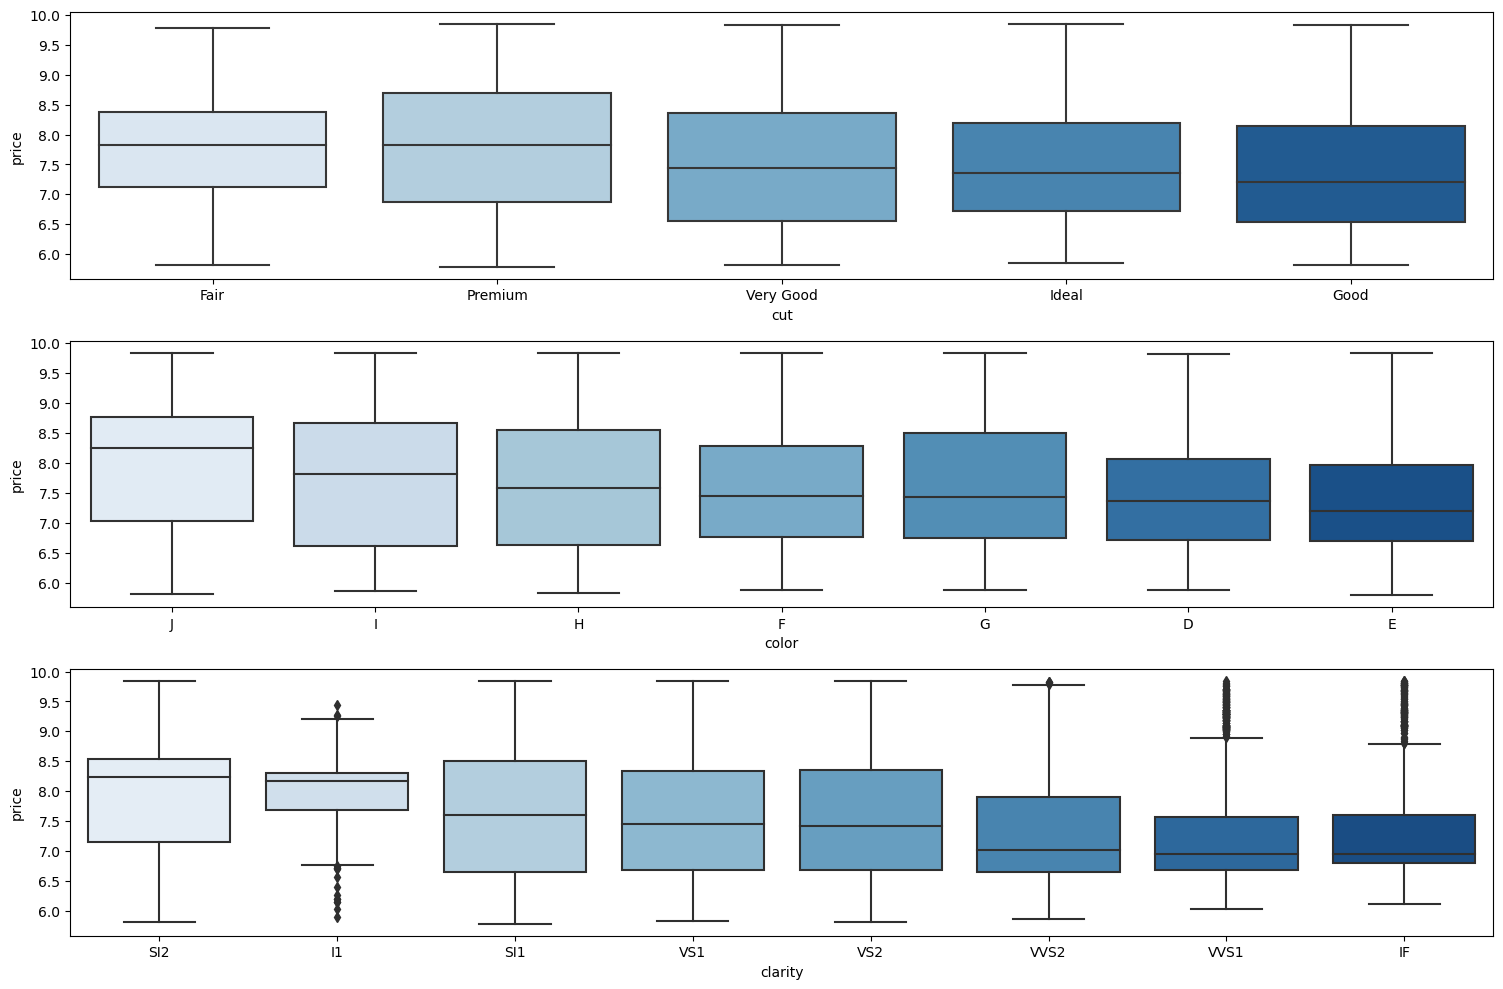

In [28]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

axes = axes.flat

columnas_categoric = df_train.select_dtypes(include='object').columns

for i, col in enumerate(columnas_categoric):

    my_order = df_train.groupby(col)['price'].median().sort_values(ascending=False).index
    sns.boxplot(
                x=df_train[col],
                y=df_train.price,
                ax=axes[i],
                palette='Blues',
                order=my_order)

fig.tight_layout();

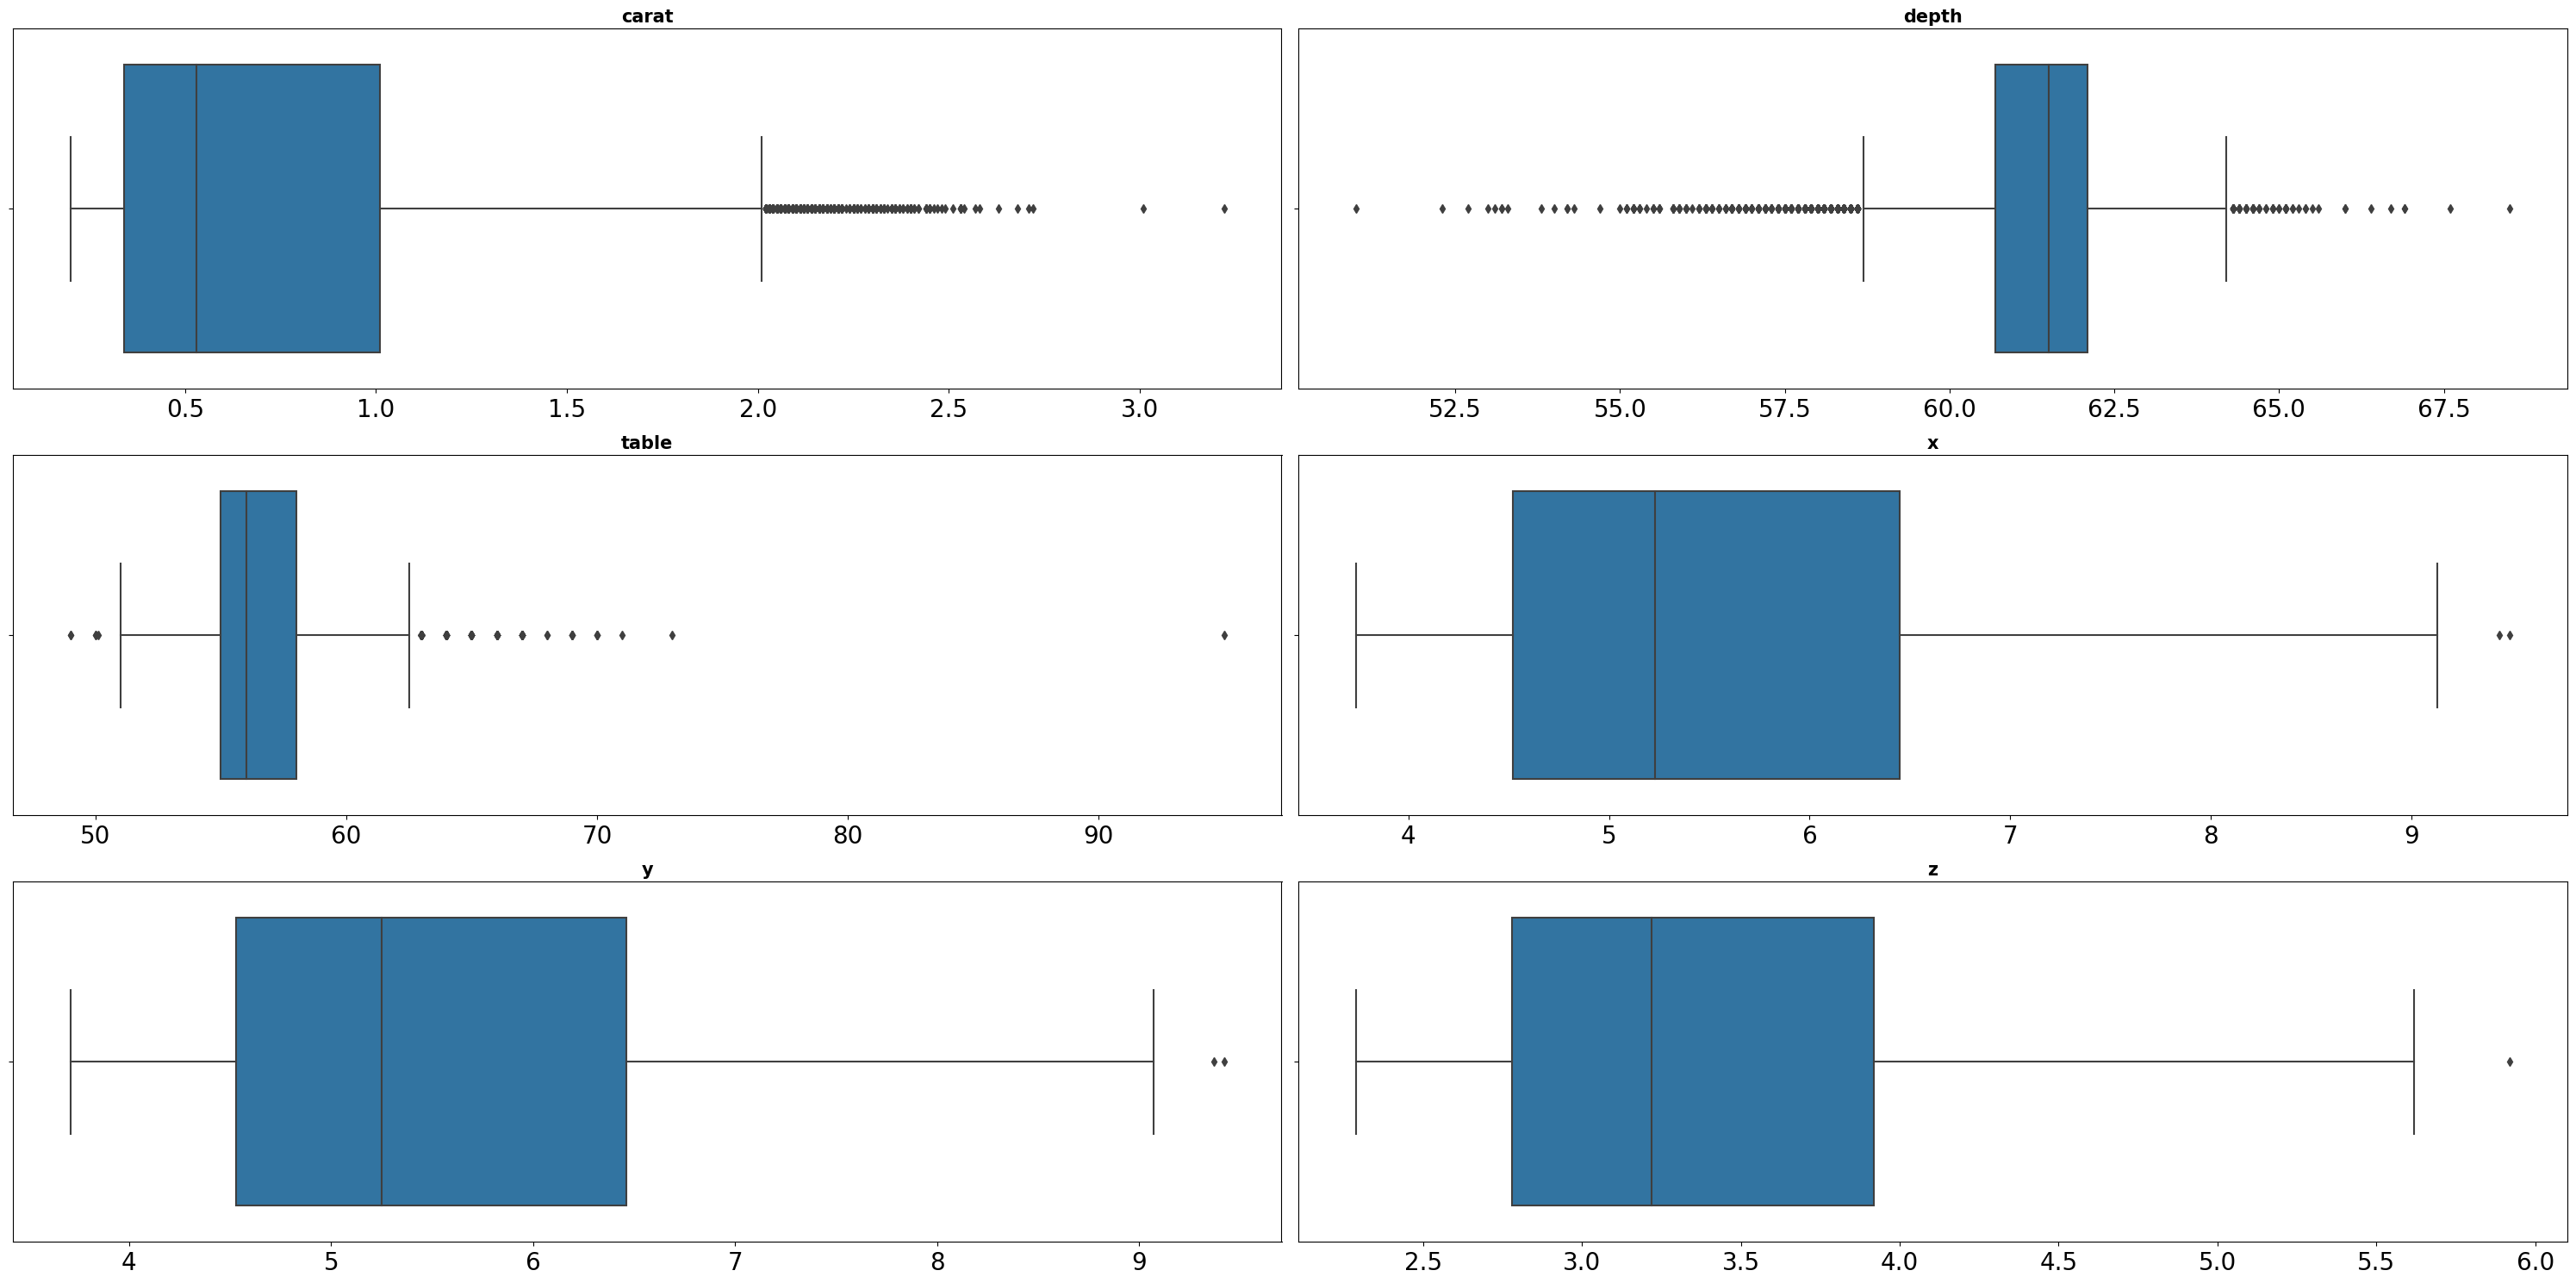

In [29]:
# Outliers in numeric cols:

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(30, 15))

axes = axes.flat

numeric_cols = df_train.drop(['price'], axis=1).select_dtypes(include=np.number)

for i, colum in enumerate(numeric_cols.columns): 
    sns.boxplot(
        data=df_train,
        x=colum,  
        ax=axes[i])
    
    axes[i].set_title(colum, fontsize=15, fontweight='bold')
    axes[i].tick_params(labelsize=20)
    axes[i].set_xlabel('')
    

fig.tight_layout();

In [30]:
# Counts outliers per column

def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} 
    
    for col in lista_columnas:
        
        Q1 = np.nanpercentile(df_train[col], 25)
        Q3 = np.nanpercentile(df_train[col], 75)
        
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0:
        
            dicc_indices[col] = len(list(outliers_data.index)) # by removing len you get the outliers indexes for each col
        
    return dicc_indices 

ind = detectar_outliers(columnas_numeric, df_train)
ind

{'carat': 429, 'depth': 829, 'table': 261, 'x': 2, 'y': 2, 'z': 1}

In [31]:
'''valores = list(ind.values())
valores = [indice for sublista in valores for indice in sublista]
valores = set(valores)
df_train.drop(df_train.index[list(valores)], inplace=True)''';

In [32]:
'''df_train = df_train[df_train["carat"] < np.percentile(df_train["carat"], 75)]
df_train = df_train[df_train["depth"] > np.percentile(df_train["depth"], 25)]
df_train = df_train[df_train["depth"] < np.percentile(df_train["depth"], 75)]
df_train = df_train[df_train["table"] < np.percentile(df_train["table"], 75)]
df_train = df_train[df_train["table"] > np.percentile(df_train["table"], 25)]
df_train = df_train[df_train["y"] < np.percentile(df_train["y"], 75)]
df_train = df_train[df_train["z"] < np.percentile(df_train["z"], 75)]''';

In [33]:
ind = detectar_outliers(columnas_numeric, df_train)
ind

{'carat': 429, 'depth': 829, 'table': 261, 'x': 2, 'y': 2, 'z': 1}

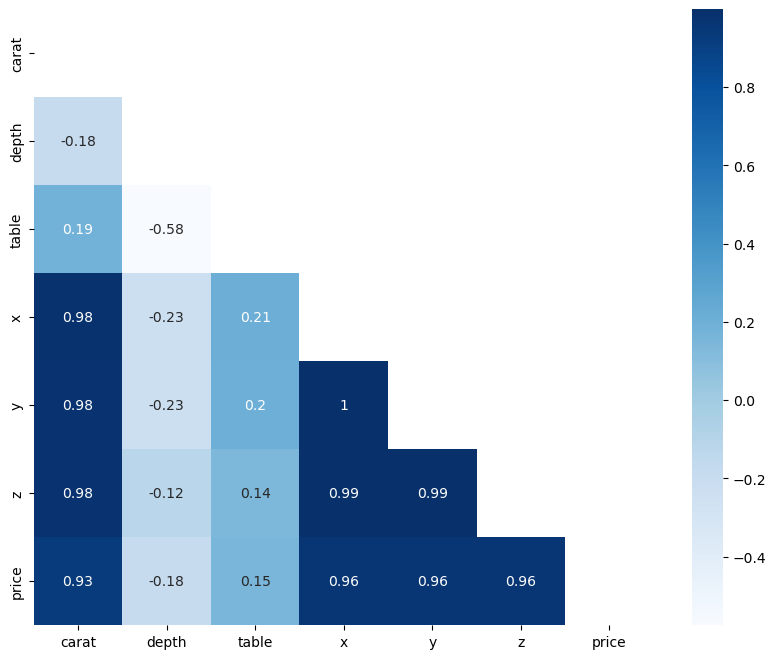

In [34]:
# Correlation matrix:

mask = np.triu(np.ones_like(df_train.corr(numeric_only=True), dtype=np.bool_))
sns.heatmap(df_train.corr(numeric_only=True), 
            cmap='Blues', 
            mask=mask,
            annot=True);

# standarization

In [35]:
df_copy = df_train.copy()

In [36]:
def standardize_numeric_data(df, cols):
    
    robust = RobustScaler()
    robust.fit(df[cols])
    
    X_robust = robust.transform(df[cols])
    df[cols] = X_robust

    return df

In [37]:
numeric_cols = df_copy.select_dtypes(include=np.number).drop(['price'], axis=1).columns
numeric_cols

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [38]:
df_copy = standardize_numeric_data(df_copy, numeric_cols)
df_copy.tail(85)

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
40294,0.701493,Very Good,G,VS2,-1.785714,2.000000,0.652850,0.678756,0.552632,8.660
40296,0.865672,Very Good,F,SI1,-1.000000,1.666667,0.730570,0.772021,0.736842,8.591
40299,-0.417910,Ideal,H,VS1,0.785714,-1.000000,-0.616580,-0.606218,-0.596491,6.098
40302,0.447761,Premium,E,SI1,-2.214286,1.000000,0.512953,0.481865,0.350877,8.162
40304,2.253731,Ideal,H,SI2,-0.214286,0.000000,1.533679,1.554404,1.587719,9.672
...,...,...,...,...,...,...,...,...,...,...
40446,0.716418,Premium,F,VS1,-0.142857,0.666667,0.626943,0.658031,0.657895,8.854
40448,-0.179104,Premium,F,VVS2,-0.642857,0.666667,-0.227979,-0.212435,-0.263158,7.017
40450,-0.164179,Premium,D,SI2,0.428571,1.000000,-0.233161,-0.222798,-0.210526,6.551


# encoding

In [39]:
df_copy_2= df_copy.copy()
df_copy_2.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,-0.343284,Premium,D,SI2,0.642857,0.666667,-0.476684,-0.502591,-0.473684,6.353
1,0.716418,Ideal,E,VVS2,0.857143,0.000000,0.616580,0.626943,0.719298,9.183
7,-0.298507,Ideal,E,VVS2,-1.071429,0.000000,-0.362694,-0.357513,-0.438596,6.877
8,-0.313433,Very Good,E,VS2,1.000000,0.000000,-0.450777,-0.445596,-0.412281,6.554
10,0.149254,Ideal,D,SI1,-0.285714,0.000000,0.150259,0.170984,0.149123,7.484


In [40]:
df_copy_2.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

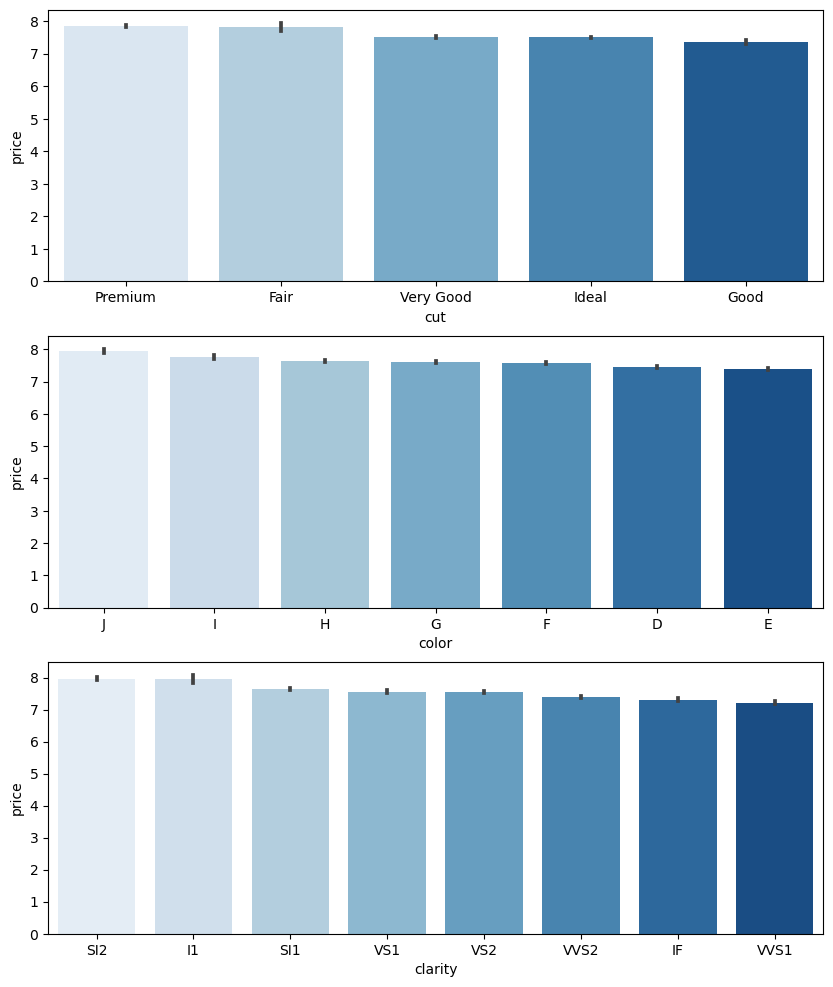

In [41]:
f, ax = plt.subplots(3,figsize = (10,12))

orden = df_train.groupby('cut')['price'].mean().sort_values(ascending=False).index
sns.barplot(x="cut",y="price",data = df_train,palette='Blues',ax=ax[0], order=orden)

orden = df_train.groupby('color')['price'].mean().sort_values(ascending=False).index
sns.barplot(x="color",y="price",data = df_train,palette='Blues',ax=ax[1], order = orden)

orden = df_train.groupby('clarity')['price'].mean().sort_values(ascending=False).index
sns.barplot(x="clarity",y="price",data = df_train,palette='Blues',ax=ax[2], order=orden)

plt.show()

In [42]:
def ordinal_encoder1(df, columna, orden):

    ordinal = OrdinalEncoder(categories = [orden], dtype = int)

    transformados_oe = ordinal.fit_transform(df[[columna]])
    
    oe_df = pd.DataFrame(transformados_oe)

    oe_df.columns = ordinal.feature_names_in_

    columna += "_oe"
    
    df[columna] = oe_df
     
    return df

In [43]:
df_train.cut.unique().tolist()

['Premium', 'Ideal', 'Very Good', 'Good', 'Fair']

In [44]:
orden = ['Fair', 'Premium', 'Good', 'Very Good', 'Ideal']
df_copy_2 = ordinal_encoder1(df_copy_2, "cut", orden)
df_copy_2.tail(85)

,carat,cut,color,clarity,depth,table,x,y,z,price,cut_oe
id,,,,,,,,,,,
40294,0.701493,Very Good,G,VS2,-1.785714,2.000000,0.652850,0.678756,0.552632,8.660,NaN
40296,0.865672,Very Good,F,SI1,-1.000000,1.666667,0.730570,0.772021,0.736842,8.591,NaN
40299,-0.417910,Ideal,H,VS1,0.785714,-1.000000,-0.616580,-0.606218,-0.596491,6.098,NaN
40302,0.447761,Premium,E,SI1,-2.214286,1.000000,0.512953,0.481865,0.350877,8.162,NaN
40304,2.253731,Ideal,H,SI2,-0.214286,0.000000,1.533679,1.554404,1.587719,9.672,NaN
...,...,...,...,...,...,...,...,...,...,...,...
40446,0.716418,Premium,F,VS1,-0.142857,0.666667,0.626943,0.658031,0.657895,8.854,NaN
40448,-0.179104,Premium,F,VVS2,-0.642857,0.666667,-0.227979,-0.212435,-0.263158,7.017,NaN
40450,-0.164179,Premium,D,SI2,0.428571,1.000000,-0.233161,-0.222798,-0.210526,6.551,NaN


In [45]:
df_train.color.unique().tolist()

['D', 'E', 'G', 'H', 'I', 'F', 'J']

In [46]:
orden = ['J', 'I', 'H', 'G', 'F', 'D', 'E']
df_copy_2 = ordinal_encoder1(df_copy_2, "color", orden)
df_copy_2.tail(85)

,carat,cut,color,clarity,depth,table,x,y,z,price,cut_oe,color_oe
id,,,,,,,,,,,,
40294,0.701493,Very Good,G,VS2,-1.785714,2.000000,0.652850,0.678756,0.552632,8.660,NaN,NaN
40296,0.865672,Very Good,F,SI1,-1.000000,1.666667,0.730570,0.772021,0.736842,8.591,NaN,NaN
40299,-0.417910,Ideal,H,VS1,0.785714,-1.000000,-0.616580,-0.606218,-0.596491,6.098,NaN,NaN
40302,0.447761,Premium,E,SI1,-2.214286,1.000000,0.512953,0.481865,0.350877,8.162,NaN,NaN
40304,2.253731,Ideal,H,SI2,-0.214286,0.000000,1.533679,1.554404,1.587719,9.672,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
40446,0.716418,Premium,F,VS1,-0.142857,0.666667,0.626943,0.658031,0.657895,8.854,NaN,NaN
40448,-0.179104,Premium,F,VVS2,-0.642857,0.666667,-0.227979,-0.212435,-0.263158,7.017,NaN,NaN
40450,-0.164179,Premium,D,SI2,0.428571,1.000000,-0.233161,-0.222798,-0.210526,6.551,NaN,NaN


In [47]:
df_train.clarity.unique().tolist()

['SI2', 'VVS2', 'VS2', 'SI1', 'VS1', 'VVS1', 'IF', 'I1']

In [48]:
orden = ['SI2', 'I1', 'SI1', 'VS2', 'VS1', 'VVS2', 'IF', 'VVS1']
df_copy_2 = ordinal_encoder1(df_copy_2, "clarity", orden)
df_copy_2.tail(85)

,carat,cut,color,clarity,depth,table,x,y,z,price,cut_oe,color_oe,clarity_oe
id,,,,,,,,,,,,,
40294,0.701493,Very Good,G,VS2,-1.785714,2.000000,0.652850,0.678756,0.552632,8.660,NaN,NaN,NaN
40296,0.865672,Very Good,F,SI1,-1.000000,1.666667,0.730570,0.772021,0.736842,8.591,NaN,NaN,NaN
40299,-0.417910,Ideal,H,VS1,0.785714,-1.000000,-0.616580,-0.606218,-0.596491,6.098,NaN,NaN,NaN
40302,0.447761,Premium,E,SI1,-2.214286,1.000000,0.512953,0.481865,0.350877,8.162,NaN,NaN,NaN
40304,2.253731,Ideal,H,SI2,-0.214286,0.000000,1.533679,1.554404,1.587719,9.672,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40446,0.716418,Premium,F,VS1,-0.142857,0.666667,0.626943,0.658031,0.657895,8.854,NaN,NaN,NaN
40448,-0.179104,Premium,F,VVS2,-0.642857,0.666667,-0.227979,-0.212435,-0.263158,7.017,NaN,NaN,NaN
40450,-0.164179,Premium,D,SI2,0.428571,1.000000,-0.233161,-0.222798,-0.210526,6.551,NaN,NaN,NaN


In [49]:
df_copy_2.drop(['cut', 'color', 'clarity'], axis=1, inplace=True)
df_copy_2.tail(85)

,carat,depth,table,x,y,z,price,cut_oe,color_oe,clarity_oe
id,,,,,,,,,,
40294,0.701493,-1.785714,2.000000,0.652850,0.678756,0.552632,8.660,NaN,NaN,NaN
40296,0.865672,-1.000000,1.666667,0.730570,0.772021,0.736842,8.591,NaN,NaN,NaN
40299,-0.417910,0.785714,-1.000000,-0.616580,-0.606218,-0.596491,6.098,NaN,NaN,NaN
40302,0.447761,-2.214286,1.000000,0.512953,0.481865,0.350877,8.162,NaN,NaN,NaN
40304,2.253731,-0.214286,0.000000,1.533679,1.554404,1.587719,9.672,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
40446,0.716418,-0.142857,0.666667,0.626943,0.658031,0.657895,8.854,NaN,NaN,NaN
40448,-0.179104,-0.642857,0.666667,-0.227979,-0.212435,-0.263158,7.017,NaN,NaN,NaN
40450,-0.164179,0.428571,1.000000,-0.233161,-0.222798,-0.210526,6.551,NaN,NaN,NaN


In [50]:
df_copy_2.isnull().sum()

carat             0
depth             0
table             0
x                 0
y                 0
z                 0
price             0
cut_oe        10048
color_oe      10048
clarity_oe    10048
dtype: int64

In [51]:
df_copy_2.dropna(inplace=True)
df_copy_2.isnull().sum()

carat         0
depth         0
table         0
x             0
y             0
z             0
price         0
cut_oe        0
color_oe      0
clarity_oe    0
dtype: int64

In [52]:
df_copy_2.shape

(11353, 10)

In [53]:
name = input('eda name')

In [54]:
df_copy_2.to_csv(f'../data/clean_{name}.csv', index = True, sep = ',')